# Análisis Exploratorio de Datos - **Proyecto del Titanic**
## ➡️ Uriel Emiliano Mendez

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set()

In [7]:
df_main = pd.read_csv('../datasets\Titanic-Dataset.csv')
df_ext = pd.read_csv('../datasets\Titanic-Dataset-Extendido.csv')

In [8]:
print(df_main.shape, df_ext.shape)

(891, 12) (891, 21)


### Pruebas empiricas.

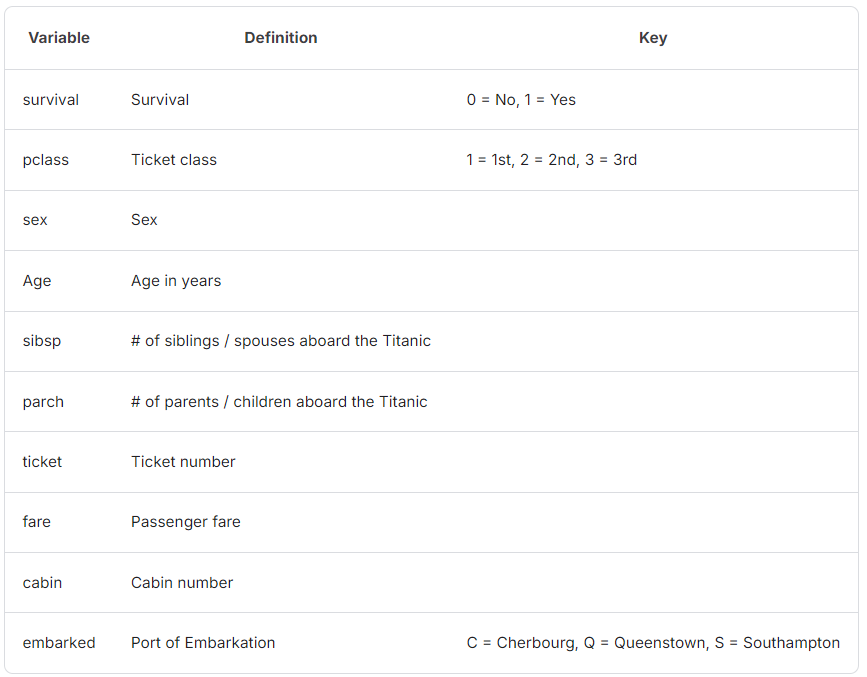

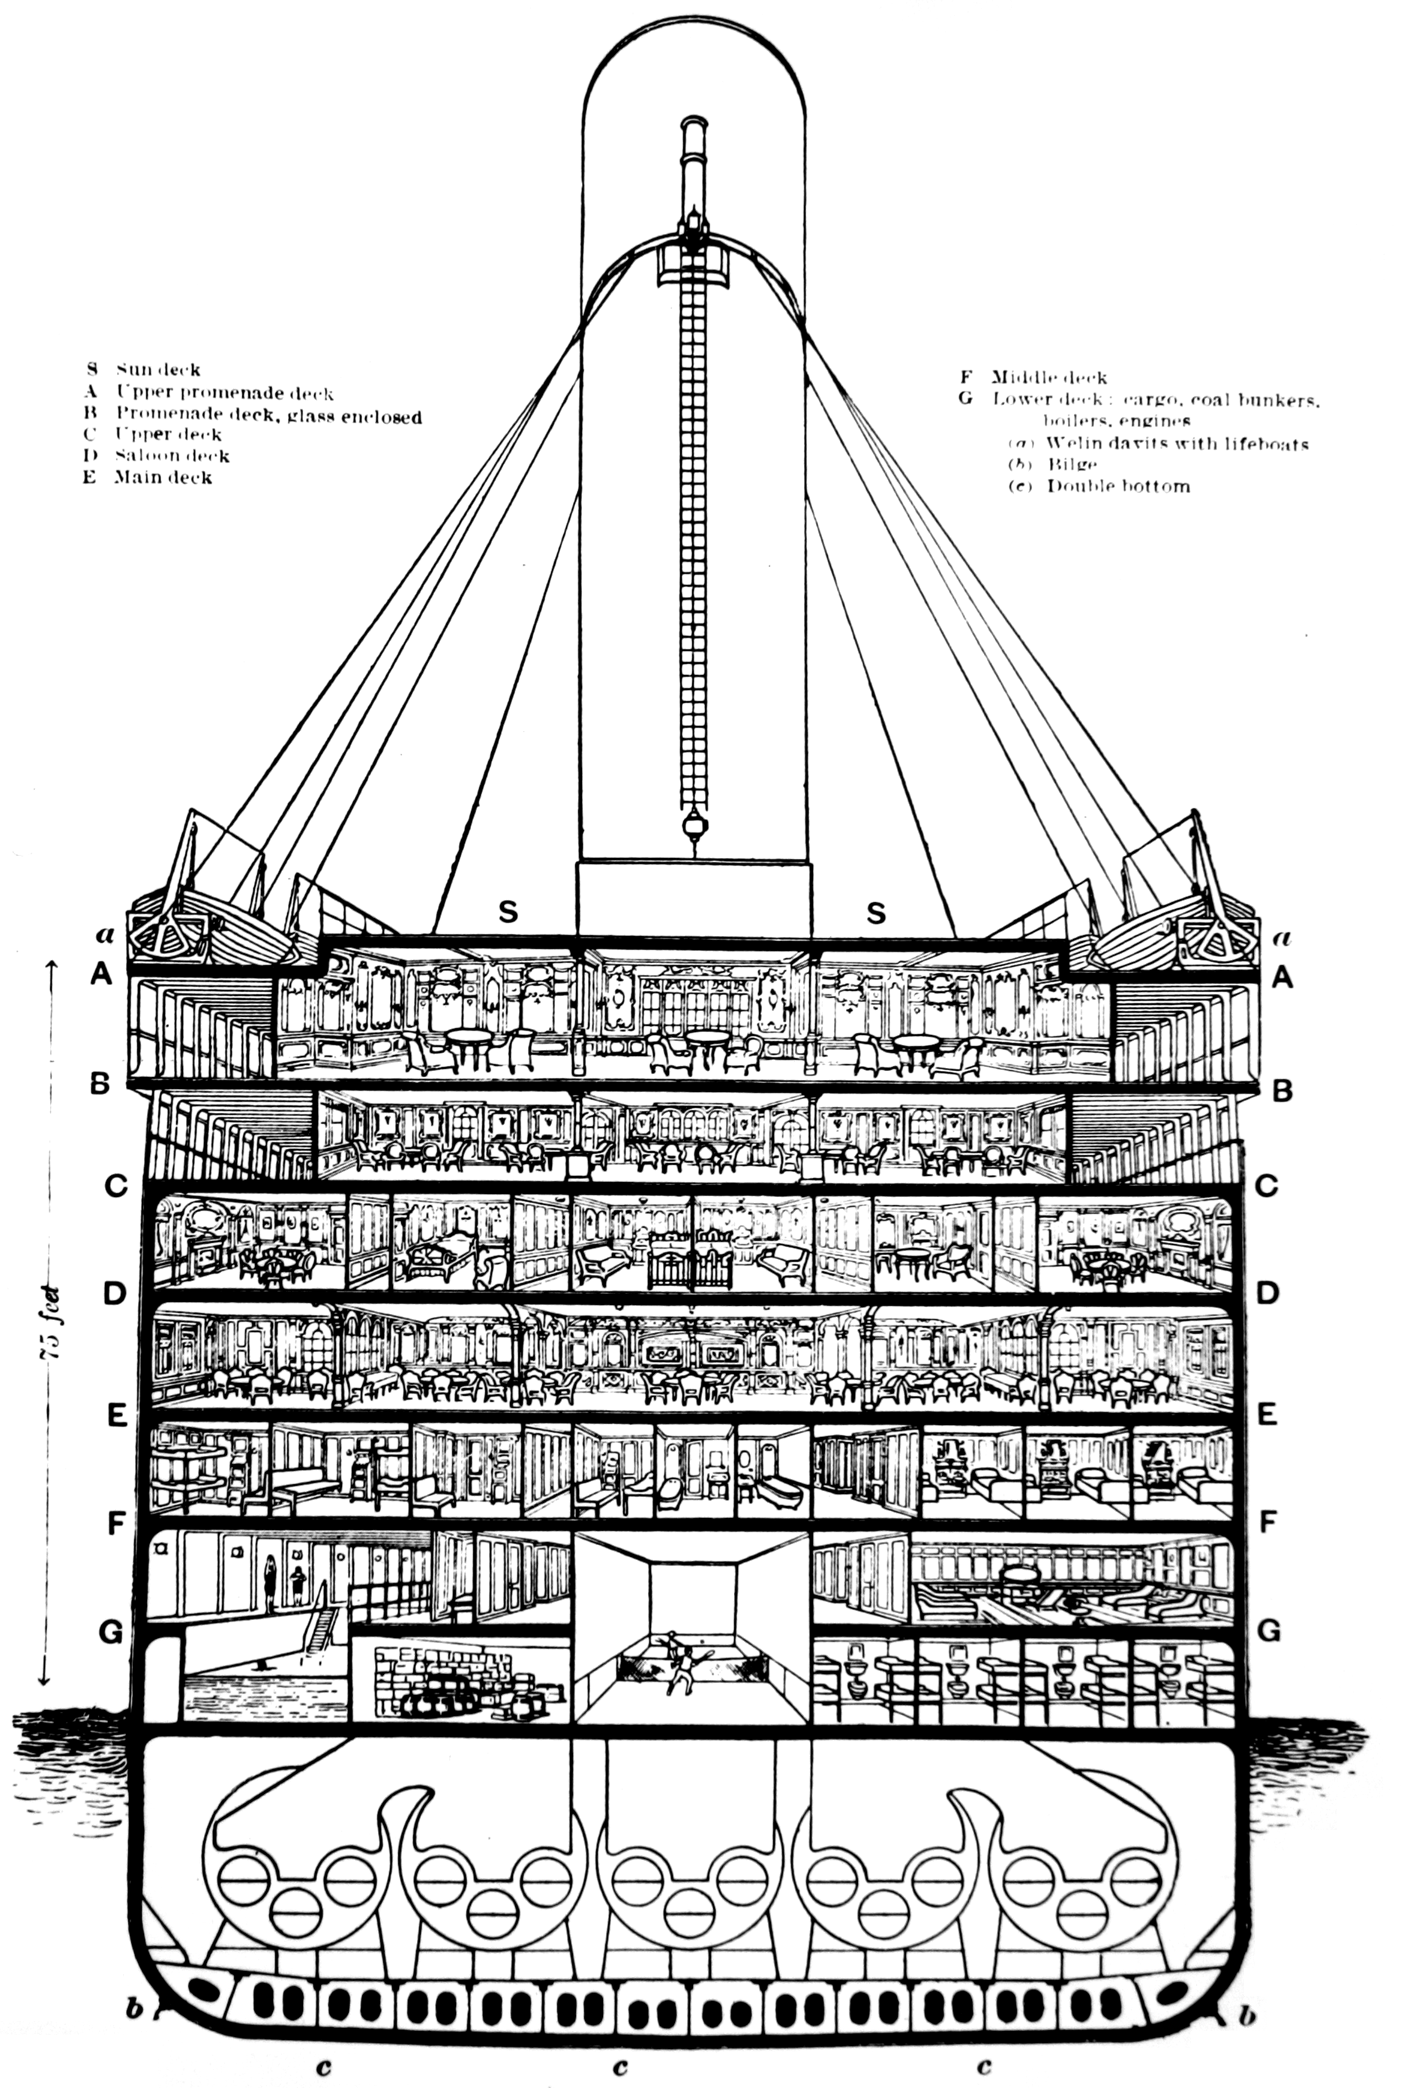

In [9]:
df = df_main.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Voy e eliminar las columnas que no necesito.

In [10]:
df = df.drop(['Ticket', 'Cabin'], axis = 1)

In [11]:
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'])

In [12]:
df_num = df.drop('Name', axis = 1)

In [13]:
df_num.isna().sum()

PassengerId      0
Survived         0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_female       0
Sex_male         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [14]:
# A los registros que tienen nulos en la columna Age, le asigno el valor de Age_wiki

df_num = df_num.merge(df_ext[['PassengerId', 'Age_wiki']], how = 'outer', on = 'PassengerId')
df_num.Age = df_num.Age.fillna(df_num.Age_wiki)

In [15]:
df_num.isna().sum()

PassengerId    0
Survived       0
Age            4
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Age_wiki       4
dtype: int64

In [16]:
df_num.loc[df_num.Age.isna()]

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Age_wiki
42,43,0,NaN,0,0,7.8958,False,True,False,False,True,True,False,False,NaN
347,348,1,NaN,1,0,16.1000,True,False,False,False,True,False,False,True,NaN
420,421,0,NaN,0,0,7.8958,False,True,False,False,True,True,False,False,NaN
557,558,0,NaN,0,0,227.5250,False,True,True,False,False,True,False,False,NaN


In [17]:
df_num = df_num.drop('Age_wiki', axis = 1)
age_to_drop = df_num.loc[df_num.Age.isna()].index
df_num = df_num.drop(age_to_drop, axis = 0).astype(float)

In [18]:
df_num.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [19]:
df_num.to_csv('../datasets/titanic-limpio-numerico.csv', index = False)

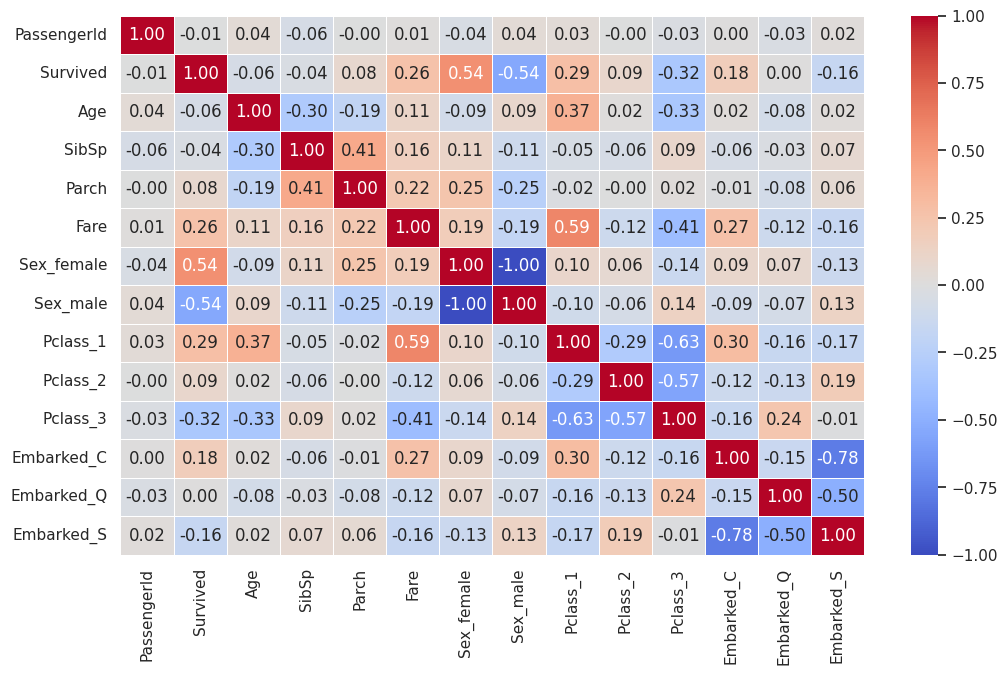

In [ ]:
correlacion = df_num[df_num.describe().columns].corr()

plt.figure(figsize=(12, 7))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

## Crear modelos de machine learning.

In [ ]:
x, y = df_num.drop('Survived', axis = 1), df_num.Survived

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)
x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 123)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_val_train.shape, x_val_test.shape, y_val_train.shape, y_val_test.shape)

(665, 13) (222, 13) (665,) (222,)
(498, 13) (167, 13) (498,) (167,)


### Arbol de decisión

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
y_pred = DecisionTreeClassifier(max_depth=30).fit(x_train, y_train).predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.7432432432432432


In [ ]:
confusion_matrix(y_test, y_pred)

array([[102,  36],
       [ 21,  63]])

### Random Forest

In [ ]:
list(range(10, 20))

TypeError: can only concatenate list (not "NoneType") to list

In [ ]:
from sklearn.ensemble import RandomForestClassifier

depth = list(range(10, 80, 10))
depth.append(None)

param_grid = {
    'n_estimators': list(range(10, 400, 50)),
    'max_depth': depth,
    'min_samples_split': list(range(2, 25, 5))
}

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=2,
                    verbose=1,
                    n_jobs=-1).fit(x_val_train, y_val_train)

print(grid.best_params_)

Fitting 2 folds for each of 320 candidates, totalling 640 fits
{'max_depth': 10, 'min_samples_split': 12, 'n_estimators': 10}


In [ ]:
y_pred = RandomForestClassifier(**grid.best_params_).fit(x_val_train, y_val_train).predict(x_val_test)
acc = accuracy_score(y_val_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.7844311377245509


## Scraping

In [ ]:
import requests

cookies = {
    'cf_clearance': 'm68TaibsdD9fgdfWBTEufWXPLLPBv45VqFx5BPDvAKI-1727630539-1.2.1.1-Fx.FuIbHwqECY5c.T.FpwWCu7vlgyY.ByXzN2qmoW8uFy8pjME.CQW8IPD6a0UCPtvYhQYyZmfbJT4sVRdz1tDxO97LJXjATOwUc5yt_lbJarEZZcz142RevuJ0w0g35cvhWUpXUijYDWFn64uBS3MPn0C3nAYbpvAka6Deal3Ega2NN_WgvlPW4dhQmQkhKbVeufM6CIDCDrS6gKW_Swh6LrbGQ5xiZlQvwVBNcoBKFw27w4Au178YH00D29NebVVTU755Vj00pt6s0VamoiEL3O013d0Pt3ct0rtC8N85LDtUlY5FFtyNARlZq_nQzYy_Os8yT6bUnx7SYM22PzJqgKKbLhL.IijeMKfp2bwiEjoBSJ0Zx30C..ZOT90y7vrxhZSrB88z1cPAMgmaTqw',
}

headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8',
    'accept-language': 'es-419,es;q=0.8',
    'cache-control': 'max-age=0',
    # 'cookie': 'cf_clearance=m68TaibsdD9fgdfWBTEufWXPLLPBv45VqFx5BPDvAKI-1727630539-1.2.1.1-Fx.FuIbHwqECY5c.T.FpwWCu7vlgyY.ByXzN2qmoW8uFy8pjME.CQW8IPD6a0UCPtvYhQYyZmfbJT4sVRdz1tDxO97LJXjATOwUc5yt_lbJarEZZcz142RevuJ0w0g35cvhWUpXUijYDWFn64uBS3MPn0C3nAYbpvAka6Deal3Ega2NN_WgvlPW4dhQmQkhKbVeufM6CIDCDrS6gKW_Swh6LrbGQ5xiZlQvwVBNcoBKFw27w4Au178YH00D29NebVVTU755Vj00pt6s0VamoiEL3O013d0Pt3ct0rtC8N85LDtUlY5FFtyNARlZq_nQzYy_Os8yT6bUnx7SYM22PzJqgKKbLhL.IijeMKfp2bwiEjoBSJ0Zx30C..ZOT90y7vrxhZSrB88z1cPAMgmaTqw',
    'priority': 'u=0, i',
    'referer': 'https://www.google.com/',
    'sec-ch-ua': '"Brave";v="129", "Not=A?Brand";v="8", "Chromium";v="129"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'cross-site',
    'sec-fetch-user': '?1',
    'sec-gpc': '1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36',
}

response = requests.get('https://www.encyclopedia-titanica.org/cabins.html', cookies=cookies, headers=headers)

In [ ]:
with open('cabin-allocations-titanic.html', 'w', encoding='utf-8') as file:
    file.write(response.text)

In [ ]:
cabins = pd.read_html('/content/cabin-allocations-titanic.html')[0]

In [ ]:
cabins.head(7)

,Cabin No.,Name,Evidence,Comments
0,Boat Deck,NaN,NaN,"6 cabins, accommodation for 7 people."
1,"""T""","Blackwell, Mr Stephen Weart",Cave List,There is no evidence that anyone else occupied...
2,NaN,NaN,NaN,NaN
3,A Deck,NaN,NaN,"36 cabins, accommodation for 48 people."
4,A-5,"Goldschmidt, Mr George B.",Cave List,NaN
5,A-6 or A-8 (?),"Beattie, Mr Thomson McCaffry, Mr Thomas Francis",Peuchen's testimony at the Senate inquiry,When Peuchen is asked about where his friends ...
6,A-7,"Smith, Mr James Clinch",Cave List,NaN


In [ ]:
cabins = cabins.dropna(subset = ['Cabin No.']).reset_index(drop = True)

In [ ]:
import json

sections = cabins.loc[cabins['Cabin No.'].str.contains('Deck')]['Cabin No.']
dic = json.loads(sections.to_json())
formatted_dic = {int(k): v for k, v in dic.items()}
formatted_dic

{0: 'Boat Deck',
 2: 'A Deck',
 24: 'B Deck',
 70: 'C Deck',
 136: 'D Deck',
 169: 'E Deck',
 171: 'E Deck (?E-10)',
 201: 'D Deck',
 203: 'E Deck',
 206: 'F Deck',
 211: 'Unknown Deck',
 213: 'D Deck',
 215: 'E Deck',
 220: 'F Deck',
 226: 'G Deck'}

In [ ]:
dataframes = []
for i, (k, v) in enumerate(formatted_dic.items()):
  try:
    start = k + 1
    limit = list(formatted_dic.keys())[i + 1]
    df = cabins[start: limit - 1]
    df['deck'] = v
    dataframes.append(df)
  except:
    start = k + 1
    limit = list(formatted_dic.keys())[i]
    df = cabins[start: limit - 1]
    df['deck'] = v
    dataframes.append(df)

<ipython-input-142-37c43396f319>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deck'] = v
<ipython-input-142-37c43396f319>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deck'] = v
<ipython-input-142-37c43396f319>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [ ]:
dataframes[13]

,Cabin No.,Name,Evidence,Comments,deck
221,38 (?),"Tobin, Mr Roger",Unknown,In section C,F Deck
222,46 (?),"Mardirosian, Mr Sarkis (+ three other steerage)",Unknown,In section E,F Deck
223,57 (?),"Krekorian, Mr Neshan",Unknown,In section E,F Deck
224,63 (?),"Abelseth, Mr Olaus Jørgensen Humblen, Mr Adolf...",Unknown,In section G,F Deck


In [ ]:
def clean_section(x):
    if pd.isna(x):
      return None

    cabin = x.strip('Deck')
    clean = re.sub(r'[^A-G]', '', str(cabin))

    return clean[0] if len(clean)  > 1 else clean

In [ ]:
df_cabins = cabins.copy()

In [ ]:
df_cabins['Cabin No.'] = df_cabins['Cabin No.'].apply(clean_section)

In [ ]:
df_cabins.Comments = df_cabins.Comments.apply(clean_section)

## **Data en internet**

Cabinas por pasajero: https://www.encyclopedia-titanica.org/cabins.html

Pasajeros por clase: https://titanicfacts.net/titanic-passenger-list/